# 1. Setup and Data Loading

In [2]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn

# Import the installed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset, skipping the first row as it seems to contain survey questions
df = pd.read_csv("kaggle_survey_2017_2021.csv", skiprows=[0])

# Display the first 5 rows of the dataframe to get an overview of the data
df.head()

/tmp/ipython-input-36701908.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,272,273,274,276,277,278,279,280,28

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning and Preprocessing


In [4]:
# Display information about the dataframe, including column data types and non-null values
df.info()

# Calculate and display the number of missing values for each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

# Calculate and display the number of duplicate rows in the dataframe
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106301 entries, 0 to 106300
Columns: 293 entries, Year to In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other
dtypes: float64(18), int64(1), object(274)
memory usage: 237.6+ MB


np.int64(4456)

In [5]:
# Print the list of all column names in the dataframe
print(df.columns.tolist())

['Year', 'Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++', 'What program

In [6]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in categorical columns with "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Fill missing values in numerical columns with the median value of the column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [7]:
# Display the first 5 rows of the dataframe after filling missing values
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,TensorBoard,Unknown,Unknown,Unknown,NaN,Unknown
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown


In [8]:
# Drop duplicate rows from the dataframe in-place
df.drop_duplicates(inplace=True)

In [9]:
# Calculate and display the number of missing values for each column after handling duplicates and missing values
df.isnull().sum()

,0
Year,0
Duration (in seconds),0
What is your age (# years)?,0
What is your gender? - Selected Choice,0
In which country do you currently reside?,0
...,...
"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai",0
"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon",0
"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor",0
"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None",101845


In [10]:
# Drop the specified column as it contains a large number of missing values or is not relevant for the analysis
df = df.drop('In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None', axis=1)

In [11]:
# Apply strip and lower functions to all categorical columns for consistent formatting
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.lower())

In [12]:
# Display the first 5 rows of the dataframe after cleaning categorical columns
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Other,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,man,india,bachelorâ€™s degree,other,5-10 years,python,r,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,2021,784.0,50-54,man,indonesia,masterâ€™s degree,program/project manager,20+ years,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,2021,924.0,22-24,man,pakistan,masterâ€™s degree,software engineer,1-3 years,python,unknown,...,unknown,unknown,unknown,unknown,unknown,tensorboard,unknown,unknown,unknown,unknown
3,2021,575.0,45-49,man,mexico,doctoral degree,research scientist,20+ years,python,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,2021,781.0,45-49,man,india,doctoral degree,other,< 1 years,python,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [13]:
# Import LabelEncoder for categorical feature encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Data Analysis

In [16]:
# Convert all column names to lowercase for consistency
df.columns = df.columns.str.lower()

In [17]:
# 1. Calculate the top 5 countries of respondents based on the count of each country
top_countries = df['in which country do you currently reside?'].value_counts().head(5)

# 2. Calculate the top 5 most common job titles based on the count of each job title
top_jobs = df['select the title most similar to your current role (or most recent title if retired): - selected choice'].value_counts().head(5)

# 3. Calculate the count of coding experience levels grouped by job role
coding_exp = df.groupby('select the title most similar to your current role (or most recent title if retired): - selected choice')['for how many years have you been writing code and/or programming?'].count().sort_values(ascending=False)

# 4. Identify columns related to programming languages and calculate the popularity of each language
lang_cols = [col for col in df.columns if "what programming languages do you use" in col.lower()]
lang_counts = df[lang_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(5)

# 5. Calculate the distribution of the top 5 highest education levels
education_dist = df['what is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().head(5)

# 4. Visualization

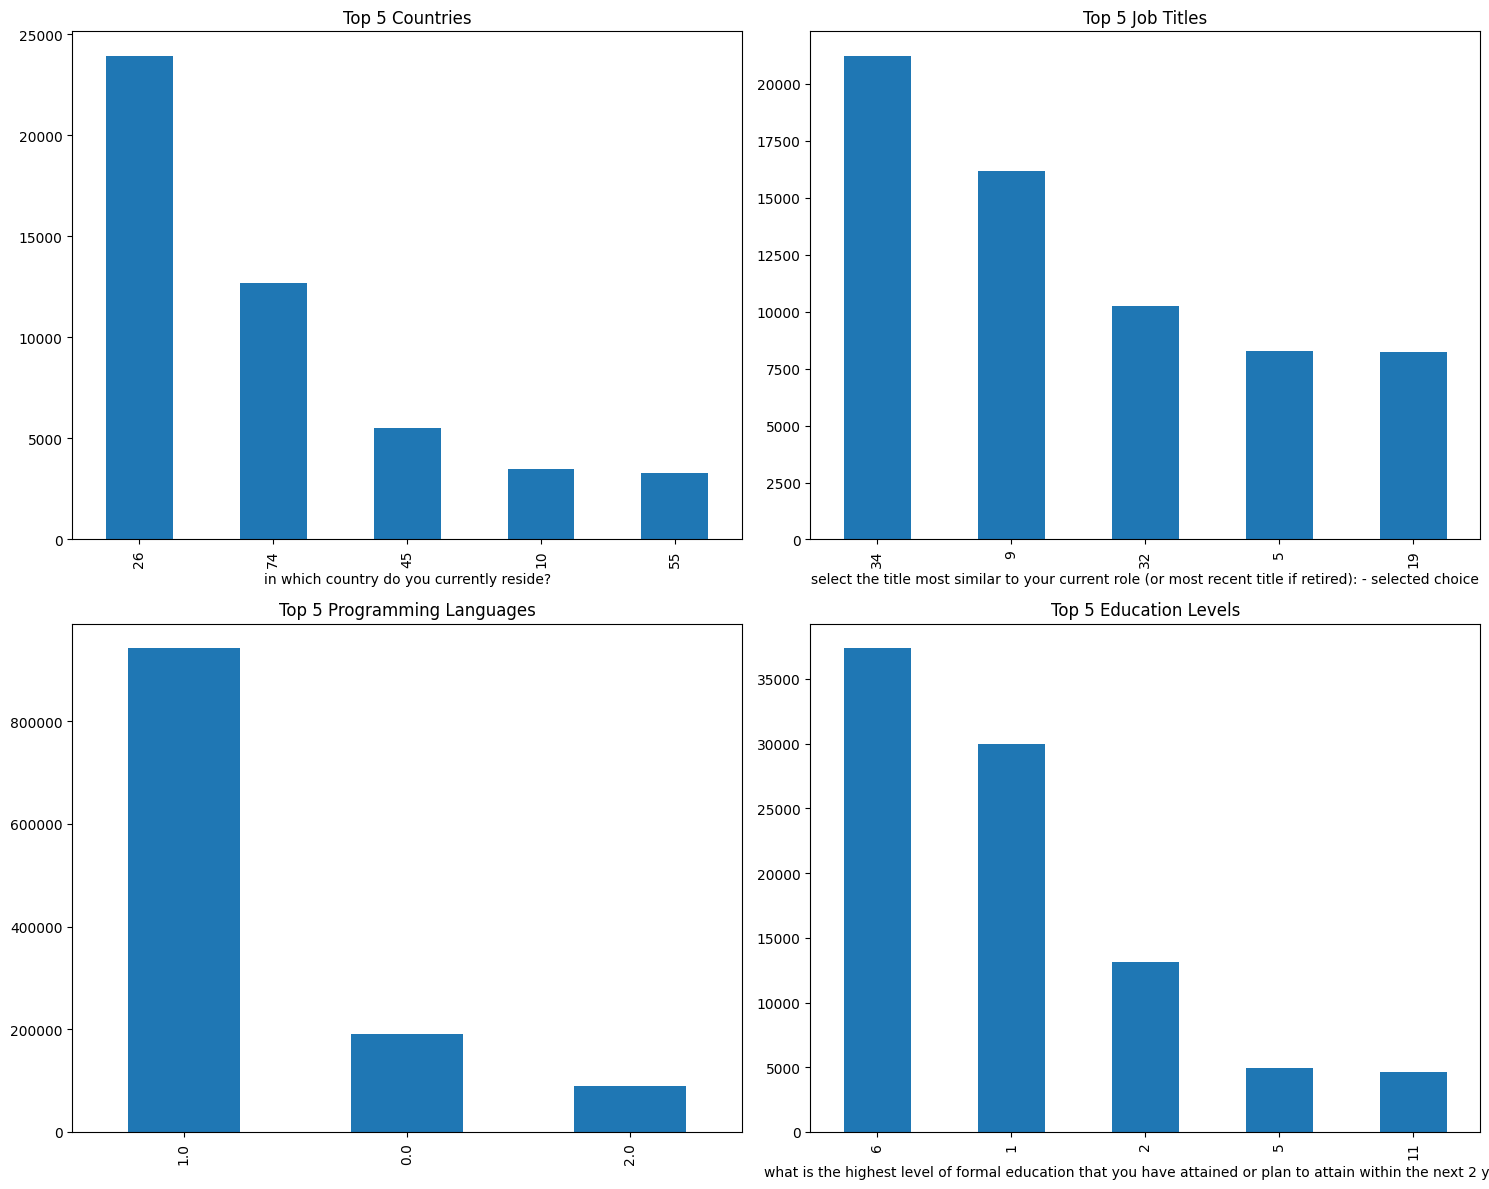

In [21]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 5 countries as a bar chart
top_countries.plot(kind='bar', ax=axes[0,0], title='Top 5 Countries')

# Plot the top 5 job titles as a bar chart
top_jobs.plot(kind='bar', ax=axes[0,1], title='Top 5 Job Titles')

# Plot the top 5 programming languages as a bar chart
lang_counts.plot(kind='bar', ax=axes[1,0], title='Top 5 Programming Languages')

# Plot the top 5 education levels as a bar chart
education_dist.plot(kind='bar', ax=axes[1,1], title='Top 5 Education Levels')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()

# 5. Interactive Dashboard

In [22]:
# Install plotly and dash libraries
!pip install plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.9 MB/s eta 0:00:00


In [1]:
# Import pandas and plotly.express
import pandas as pd
import plotly.express as px

# Load the dataset, skipping the first row
df = pd.read_csv("kaggle_survey_2017_2021.csv", skiprows=[0])

# Clean up column names by removing leading/trailing whitespace
df.columns = df.columns.str.strip()

# Fill missing values with "Unknown"
df = df.fillna("Unknown")

# Display the first 5 rows of the dataframe
df.head()

/tmp/ipython-input-3839288035.py:4: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,272,273,274,276,277,278,279,280,

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,TensorBoard,Unknown,Unknown,Unknown,Unknown,Unknown
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [2]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [3]:
# Top 5 countries: Calculate counts and create a bar chart using Plotly
top_countries = df['in which country do you currently reside?'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Count']
fig_countries = px.bar(top_countries, x='Count', y='Country', orientation='h',
                       title='Top 5 Respondent Countries',
                       color='Count', color_continuous_scale='Blues')

# Top programming languages: Identify relevant columns, melt the data, calculate counts, and create a treemap using Plotly
lang_cols = [col for col in df.columns if 'what programming languages do you use' in col.lower()]
lang_data = df[lang_cols].melt(value_name='Language').dropna()
lang_counts = lang_data['Language'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']
fig_lang = px.treemap(lang_counts, path=['Language'], values='Count',
                      title='Most Popular Programming Languages')

# Job title distribution: Calculate counts and create a pie chart using Plotly
top_jobs = df['select the title most similar to your current role (or most recent title if retired): - selected choice'].value_counts().head(5).reset_index()
top_jobs.columns = ['Job Title', 'Count']
fig_jobs = px.pie(top_jobs, names='Job Title', values='Count',
                  title='Top 5 Job Titles', hole=0.4)

# Education level vs years coding: Group by education and coding experience, calculate counts, and create a bar chart using Plotly
edu_coding = df.groupby(['what is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
                         'for how many years have you been writing code and/or programming?']).size().reset_index(name='Count')
fig_edu_coding = px.bar(edu_coding, x='for how many years have you been writing code and/or programming?',
                        y='Count', color='what is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
                        title='Education Level vs Coding Experience')

In [6]:
# Import necessary components from Dash
from dash import Dash, html, dcc

# Initialize the Dash application
app = Dash(__name__)

# Define the layout of the Dash dashboard
app.layout = html.Div([
    # Add a main title to the dashboard
    html.H1("Kaggle Survey Insights Dashboard", style={'textAlign': 'center'}),

    # Create a division for the first row of graphs (Countries and Job Titles)
    html.Div([
        # Add the Plotly graph for Top 5 Countries
        dcc.Graph(figure=fig_countries),
        # Add the Plotly graph for Top 5 Job Titles
        dcc.Graph(figure=fig_jobs),
    ], style={'display': 'flex', 'flexDirection': 'row'}), # Style to display graphs in a row

    # Create a division for the second row of graphs (Programming Languages and Education vs Coding)
    html.Div([
        # Add the Plotly graph for Most Popular Programming Languages
        dcc.Graph(figure=fig_lang),
        # Add the Plotly graph for Education Level vs Coding Experience
        dcc.Graph(figure=fig_edu_coding),
    ], style={'display': 'flex', 'flexDirection': 'row'}) # Style to display graphs in a row
])

# Run the Dash application if the script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>